In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance

import eli5
from eli5.sklearn import PermutationImportance
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [2]:
pd.set_option('display.max_columns', None)

df = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')

# Exploratory Data Analysis

In [3]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
df.shape

(891, 12)

In [8]:
df_test.shape

(418, 11)

In [9]:
print(df.Survived.unique())
print(df.Pclass.unique())
print(df.SibSp.unique())
print(df.Parch.unique())

[0 1]
[3 1 2]
[1 0 3 4 2 5 8]
[0 1 2 5 3 4 6]


Text(0.5, 0, 'Survived or Not survived')

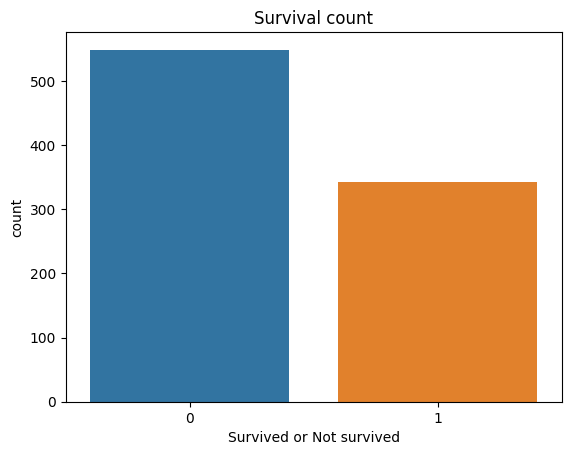

In [10]:
sns.countplot(x = df.Survived)
plt.title("Survival count")
plt.xlabel('Survived or Not survived')

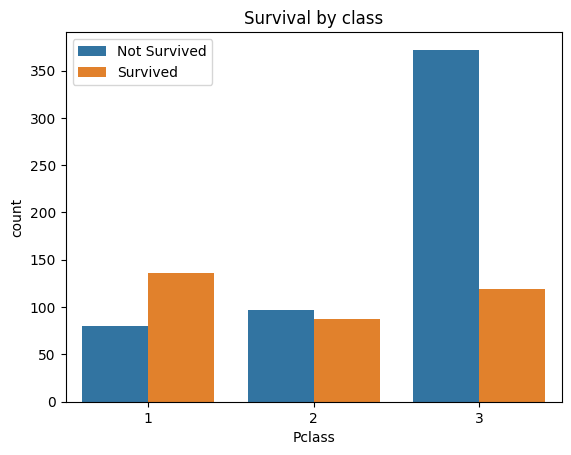

In [11]:
sns.countplot(x = df.Pclass, hue = df.Survived)
plt.title("Survival by class")
plt.legend(labels = ['Not Survived', 'Survived'])

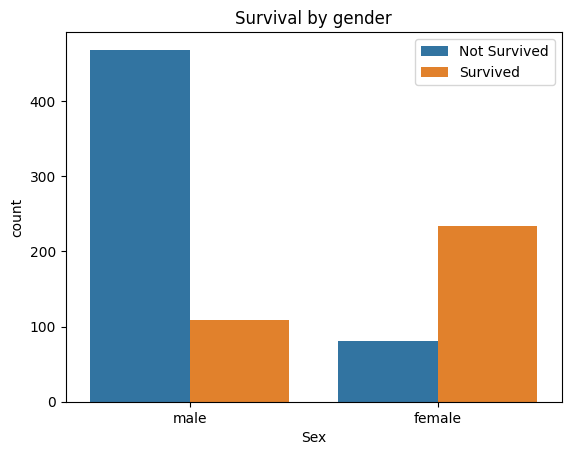

In [12]:
sns.countplot(x = df.Sex, hue = df.Survived)
plt.title('Survival by gender')
plt.legend(labels = ['Not Survived', 'Survived'])

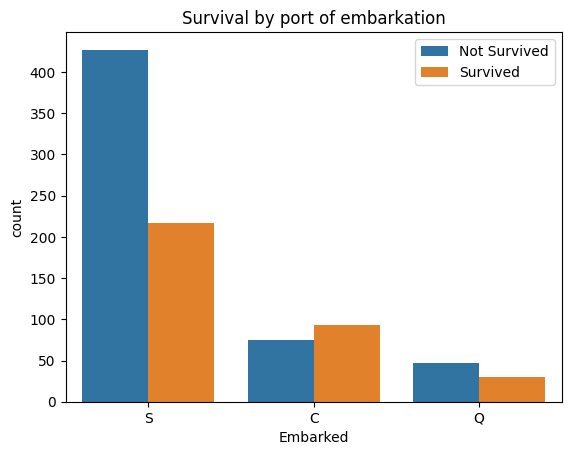

In [13]:
sns.countplot(x = df.Embarked, hue = df.Survived)
plt.title('Survival by port of embarkation')
plt.legend(labels = ['Not Survived', 'Survived'])

# Data preprocessing

## a) Null values

In [14]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

**1. Embarked**

In [16]:
embarked_is_null = df[df.Embarked.isnull()]
embarked_is_null

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [17]:
df['Embarked'] = df.Embarked.fillna(df.Embarked.mode()[0])

In [18]:
#df.dropna(subset = ['Embarked'], inplace = True)

**2. Age**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

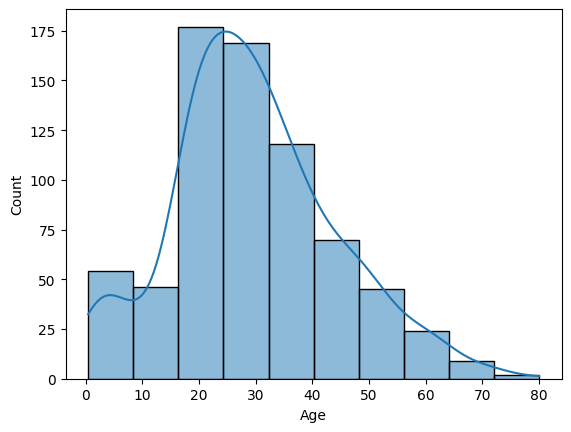

In [19]:
sns.histplot(x = 'Age', data = df, bins = 10, kde = True)

In [20]:
age_mode = df.Age.mode()[0]
age_mode

24.0

In [21]:
imputer_age = SimpleImputer(strategy = 'most_frequent')
df['Age'] = imputer_age.fit_transform(df[['Age']])

# OR

#df.Age = df.Age.fillna(age_mode)

In [22]:
df_test.Age = df_test.Age.fillna(age_mode)

**3. Fare**

In [23]:
df_test.dropna(subset = ['Fare'], inplace = True)

## b) Encoding categorical features

In [24]:
categorical_cols = [df.select_dtypes(include = 'object').columns][0].to_list()
categorical_cols

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

**1. Dropping name**

In [25]:
df.pop('Name')

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [26]:
df_test.pop('Name')

0                                  Kelly, Mr. James
1                  Wilkes, Mrs. James (Ellen Needs)
2                         Myles, Mr. Thomas Francis
3                                  Wirz, Mr. Albert
4      Hirvonen, Mrs. Alexander (Helga E Lindqvist)
                           ...                     
413                              Spector, Mr. Woolf
414                    Oliva y Ocana, Dona. Fermina
415                    Saether, Mr. Simon Sivertsen
416                             Ware, Mr. Frederick
417                        Peter, Master. Michael J
Name: Name, Length: 417, dtype: object

**2. Encoding sex and embarked features**

In [27]:
onehot_cols = ['Sex', 'Embarked']

In [28]:
df = pd.get_dummies(df, columns = onehot_cols, dtype = int, drop_first = True)

In [29]:
df_test = pd.get_dummies(df_test, columns = onehot_cols, dtype = int, drop_first = True)

In [30]:
# OR

In [31]:
#onehotEncoder = OneHotEncoder(handle_unknown  = 'ignore', sparse = False, drop = 'first')

In [32]:
#df_oh = pd.DataFrame(data = onehotEncoder.fit_transform(df[onehot_cols]), columns = onehotEncoder.get_feature_names_out(onehot_cols)).astype(int)

#df = df.drop(onehot_cols, axis = 1)
#df = pd.concat([df, df_oh], axis = 1)

In [33]:
#df_test_oh = pd.DataFrame(data = onehotEncoder.transform(df_test[onehot_cols]), columns = onehotEncoder.get_feature_names_out(onehot_cols)).astype(int)

#df_test = df_test.drop(onehot_cols, axis = 1)
#df_test = pd.concat([df_test, df_test_oh], axis = 1)

## c) Feature engineering

**Features created :-**
1. Cabin_letter (cabin deck)
2. Cabin_missing
3. Ticket_freq
4. Family_size
5. Age_group

In [34]:
print(df.Ticket.nunique())
print(df.Cabin.nunique())

681
147


In [35]:
df[['Pclass', 'Ticket', 'Cabin']].head(20)

,Pclass,Ticket,Cabin
0,3,A/5 21171,NaN
1,1,PC 17599,C85
2,3,STON/O2. 3101282,NaN
3,1,113803,C123
4,3,373450,NaN
5,3,330877,NaN
6,1,17463,E46
7,3,349909,NaN
8,3,347742,NaN
9,2,237736,NaN


**1. Cabin_letter**

In [36]:
flag = 0

for cabin_num in df.Cabin:
    if not(('A' <= str(cabin_num)[0] <= 'Z') or ('a' <= str(cabin_num)[0] <= 'z')):
        flag = 1
        break

flag

0

In [37]:
df['Cabin_letter'] = df.Cabin.str[0]

In [38]:
df_test['Cabin_letter'] = df_test.Cabin.str[0]

Text(0.5, 1.0, 'Passengers in cabin')

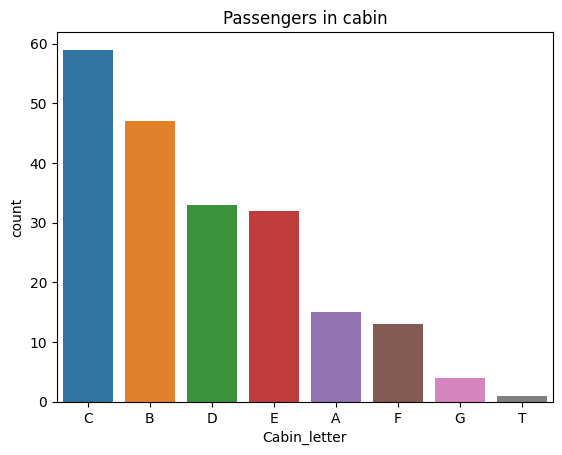

In [39]:
cabin_freq = df.Cabin_letter.value_counts()

sns.countplot(x = df.Cabin_letter, order = cabin_freq.index)
plt.title('Passengers in cabin')

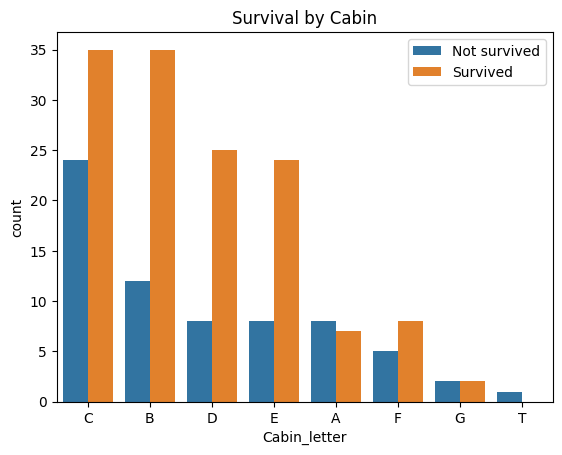

In [40]:
sns.countplot(x = df.Cabin_letter, hue = df.Survived, order = cabin_freq.index)
plt.title('Survival by Cabin')
plt.legend(labels = ['Not survived', 'Survived'])

*Removing cabin letter T and G, as they are outliers*

In [41]:
df.Cabin_letter.value_counts()

Cabin_letter
C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: count, dtype: int64

In [42]:
df = df[(df.Cabin_letter != 'T') & (df.Cabin_letter != 'G')]
df_test = df_test[(df_test.Cabin_letter != 'T') & (df_test.Cabin_letter != 'G')]

*Encoding cabin letter*

In [43]:
df = pd.get_dummies(df, columns = ['Cabin_letter'], dtype = int, drop_first = True)

In [44]:
df_test = pd.get_dummies(df_test, columns = ['Cabin_letter'], dtype = int, drop_first = True)

**2. Cabin_missing**

In [45]:
df['Cabin_missing'] = df.Cabin.isna().astype(int)

In [46]:
df_test['Cabin_missing'] = df_test.Cabin.isna().astype(int)

In [47]:
df.pop('Cabin')

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 886, dtype: object

In [48]:
df_test.pop('Cabin')

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
413     NaN
414    C105
415     NaN
416     NaN
417     NaN
Name: Cabin, Length: 416, dtype: object

**3. Ticket_freq**

In [49]:
ticket_freq = df['Ticket'].value_counts().to_dict()
df['Ticket_freq'] = df['Ticket'].map(ticket_freq)

In [50]:
ticket_freq_test = df_test.Ticket.value_counts().to_dict()
df_test['Ticket_freq'] = df_test.Ticket.map(ticket_freq_test)

In [51]:
df.pop('Ticket')

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 886, dtype: object

In [52]:
df_test.pop('Ticket')

0                  330911
1                  363272
2                  240276
3                  315154
4                 3101298
              ...        
413             A.5. 3236
414              PC 17758
415    SOTON/O.Q. 3101262
416                359309
417                  2668
Name: Ticket, Length: 416, dtype: object

**4. Family_size**

In [53]:
df['Family_size'] = df.SibSp + df.Parch + 1

In [54]:
df_test['Family_size'] = df_test.SibSp + df_test.Parch + 1

**5. Age_group**

In [55]:
df.Age.describe()

count    886.000000
mean      28.610801
std       13.168247
min        0.420000
25%       22.000000
50%       24.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [56]:
age_bins = [0, 12, 19, 35, 50, 70, 100]
age_labels = ['child', 'teen', 'young adult', 'adult', 'senior', 'old']

df['Age_group'] = pd.cut(df.Age, bins = age_bins, labels = age_labels,  right = True)
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Cabin_letter_B,Cabin_letter_C,Cabin_letter_D,Cabin_letter_E,Cabin_letter_F,Cabin_missing,Ticket_freq,Family_size,Age_group
0,1,0,3,22.0,1,0,7.2500,1,0,1,0,0,0,0,0,1,1,2,young adult
1,2,1,1,38.0,1,0,71.2833,0,0,0,0,1,0,0,0,0,1,2,adult
2,3,1,3,26.0,0,0,7.9250,0,0,1,0,0,0,0,0,1,1,1,young adult
3,4,1,1,35.0,1,0,53.1000,0,0,1,0,1,0,0,0,0,2,2,young adult
4,5,0,3,35.0,0,0,8.0500,1,0,1,0,0,0,0,0,1,1,1,young adult


In [57]:
df_test['Age_group'] = pd.cut(df_test.Age, labels = age_labels, bins = age_bins, right = True)
df_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Cabin_letter_B,Cabin_letter_C,Cabin_letter_D,Cabin_letter_E,Cabin_letter_F,Cabin_missing,Ticket_freq,Family_size,Age_group
0,892,3,34.5,0,0,7.8292,1,1,0,0,0,0,0,0,1,1,1,young adult
1,893,3,47.0,1,0,7.0000,0,0,1,0,0,0,0,0,1,1,2,adult
2,894,2,62.0,0,0,9.6875,1,1,0,0,0,0,0,0,1,1,1,senior
3,895,3,27.0,0,0,8.6625,1,0,1,0,0,0,0,0,1,1,1,young adult
4,896,3,22.0,1,1,12.2875,0,0,1,0,0,0,0,0,1,1,3,young adult


*Encoding Age_group*

In [58]:
df = pd.get_dummies(df, columns = ['Age_group'], dtype = int, drop_first = True)

In [59]:
df_test = pd.get_dummies(df_test, columns = ['Age_group'], dtype = int, drop_first = True)

In [60]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Cabin_letter_B,Cabin_letter_C,Cabin_letter_D,Cabin_letter_E,Cabin_letter_F,Cabin_missing,Ticket_freq,Family_size,Age_group_teen,Age_group_young adult,Age_group_adult,Age_group_senior,Age_group_old
0,1,0,3,22.0,1,0,7.2500,1,0,1,0,0,0,0,0,1,1,2,0,1,0,0,0
1,2,1,1,38.0,1,0,71.2833,0,0,0,0,1,0,0,0,0,1,2,0,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0
3,4,1,1,35.0,1,0,53.1000,0,0,1,0,1,0,0,0,0,2,2,0,1,0,0,0
4,5,0,3,35.0,0,0,8.0500,1,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0


In [61]:
df_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Cabin_letter_B,Cabin_letter_C,Cabin_letter_D,Cabin_letter_E,Cabin_letter_F,Cabin_missing,Ticket_freq,Family_size,Age_group_teen,Age_group_young adult,Age_group_adult,Age_group_senior,Age_group_old
0,892,3,34.5,0,0,7.8292,1,1,0,0,0,0,0,0,1,1,1,0,1,0,0,0
1,893,3,47.0,1,0,7.0000,0,0,1,0,0,0,0,0,1,1,2,0,0,1,0,0
2,894,2,62.0,0,0,9.6875,1,1,0,0,0,0,0,0,1,1,1,0,0,0,1,0
3,895,3,27.0,0,0,8.6625,1,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0
4,896,3,22.0,1,1,12.2875,0,0,1,0,0,0,0,0,1,1,3,0,1,0,0,0


## d) Removing PassengerId

In [62]:
df_copy = df.copy()
df_test_copy = df_test.copy()

In [63]:
df.pop('PassengerId')
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Cabin_letter_B,Cabin_letter_C,Cabin_letter_D,Cabin_letter_E,Cabin_letter_F,Cabin_missing,Ticket_freq,Family_size,Age_group_teen,Age_group_young adult,Age_group_adult,Age_group_senior,Age_group_old
0,0,3,22.0,1,0,7.2500,1,0,1,0,0,0,0,0,1,1,2,0,1,0,0,0
1,1,1,38.0,1,0,71.2833,0,0,0,0,1,0,0,0,0,1,2,0,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0
3,1,1,35.0,1,0,53.1000,0,0,1,0,1,0,0,0,0,2,2,0,1,0,0,0
4,0,3,35.0,0,0,8.0500,1,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0


In [64]:
df_test.pop('PassengerId')
df_test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Cabin_letter_B,Cabin_letter_C,Cabin_letter_D,Cabin_letter_E,Cabin_letter_F,Cabin_missing,Ticket_freq,Family_size,Age_group_teen,Age_group_young adult,Age_group_adult,Age_group_senior,Age_group_old
0,3,34.5,0,0,7.8292,1,1,0,0,0,0,0,0,1,1,1,0,1,0,0,0
1,3,47.0,1,0,7.0000,0,0,1,0,0,0,0,0,1,1,2,0,0,1,0,0
2,2,62.0,0,0,9.6875,1,1,0,0,0,0,0,0,1,1,1,0,0,0,1,0
3,3,27.0,0,0,8.6625,1,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0
4,3,22.0,1,1,12.2875,0,0,1,0,0,0,0,0,1,1,3,0,1,0,0,0


# Model building and evaluation

**Splitting the dataset**

In [65]:
X = df.drop(['Survived'], axis = 1)
y = df['Survived']

In [66]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

## a) Random Forest

**Hyperparameter Tuning**

In [67]:
param_grid = {
    'n_estimators': [100, 200],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [68]:
rf = RandomForestClassifier(random_state = 42)

In [69]:
%%time

grid_search = GridSearchCV(
    estimator = rf,
    param_grid = param_grid,
    cv = 5,
    scoring = 'accuracy'
)

grid_search.fit(X_train, y_train)

CPU times: user 2min 8s, sys: 946 ms, total: 2min 9s
Wall time: 2min 9s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

In [70]:
print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

0.8502347417840376
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
RandomForestClassifier(min_samples_leaf=2, random_state=42)


In [71]:
best_rf = grid_search.best_estimator_

In [72]:
y_pred = best_rf.predict(X_val)

### Evaluation

**1. Permutation importance**

In [73]:
perm = PermutationImportance(best_rf, random_state = 42)
perm.fit(X_val, y_val)

PermutationImportance(estimator=RandomForestClassifier(min_samples_leaf=2,
                                                       random_state=42),
                      random_state=42)

In [74]:
eli5.show_weights(perm, feature_names = X_val.columns.tolist())

Weight,Feature
0.1258 ± 0.0495,Sex_male
0.0180 ± 0.0131,Age
0.0157 ± 0.0045,Pclass
0.0124 ± 0.0218,Age_group_young adult
0.0101 ± 0.0131,Ticket_freq
0.0079 ± 0.0115,Embarked_S
0.0056 ± 0.0071,Parch
0.0056 ± 0.0000,Age_group_senior
0.0045 ± 0.0045,Cabin_letter_E
0.0045 ± 0.0110,Cabin_missing


**2. Feature importance**

In [75]:
forest_importance = pd.DataFrame(grid_search.best_estimator_.feature_importances_, 
                                 columns = ['gini_importance'], 
                                 index = X.columns
                                )
forest_importance = forest_importance.sort_values(by = 'gini_importance', ascending = False)

#Only extracting the features with importances > 0 and only taking the first 10 features
forest_importance = forest_importance[forest_importance['gini_importance'] != 0]
forest_importance = forest_importance.head(10)
forest_importance

,gini_importance
Sex_male,0.312410
Fare,0.185116
Age,0.131943
Pclass,0.078812
Ticket_freq,0.057696
Family_size,0.048612
Cabin_missing,0.034392
SibSp,0.028460
Parch,0.022121
Embarked_S,0.020408


Text(0.5, 0, 'Importance')

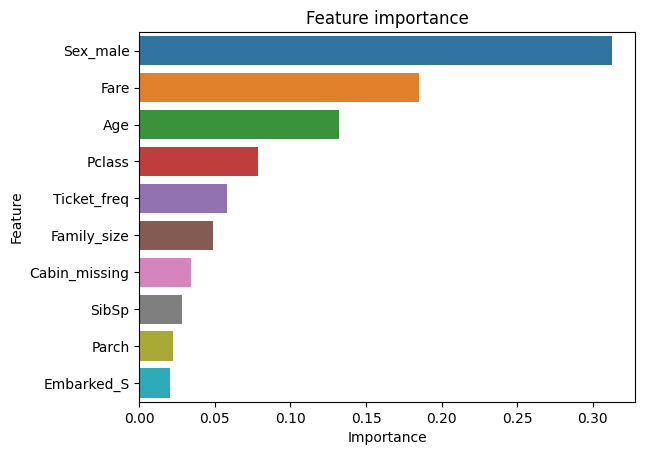

In [76]:
sns.barplot(data = forest_importance, x = "gini_importance", y = forest_importance.index, orient = 'h')
plt.title("Feature importance")
plt.ylabel("Feature")
plt.xlabel("Importance")

**3. Confusion matrix**

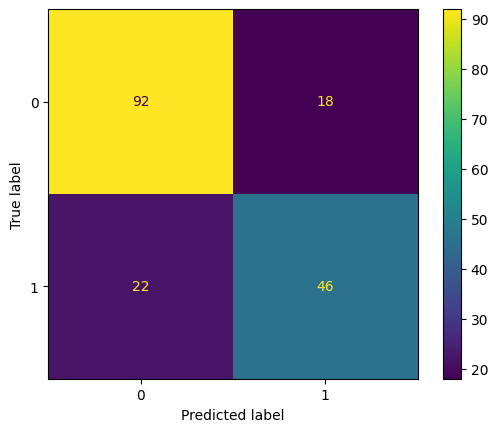

In [77]:
cm = confusion_matrix(y_val, y_pred, labels = best_rf.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = best_rf.classes_)
disp.plot(values_format = '')

**4. Accuracy**

In [78]:
accuracy_score(y_val, y_pred) * 100

77.52808988764045

## b) XGBoost

In [79]:
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0]
}

In [80]:
xgb = XGBClassifier(random_state = 42)

In [81]:
%%time

grid_search_xgb = GridSearchCV(
    estimator = xgb,
    param_grid = param_grid_xgb,
    cv = 5,
    scoring = 'accuracy'
    )

grid_search_xgb.fit(X_train, y_train)

CPU times: user 6min 30s, sys: 8.83 s, total: 6min 39s
Wall time: 1min 45s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='accuracy')

In [82]:
print(grid_search_xgb.best_score_)
print(grid_search_xgb.best_params_)
print(grid_search_xgb.best_estimator_)

0.8445809609429628
{'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 200, 'subsample': 0.8}
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)


In [83]:
best_xgb = grid_search_xgb.best_estimator_

In [84]:
y_pred_xgb = best_xgb.predict(X_val)

### Evaluation

**1. Permutation importance**

In [85]:
perm = PermutationImportance(best_xgb, random_state = 42)
perm.fit(X_val, y_val)

PermutationImportance(estimator=XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=0.2, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=3,
                                              max_leaves=None,
                                              min_child_weight=5, missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=200, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...),
                      random_state=42)

In [86]:
eli5.show_weights(perm, feature_names = X_val.columns.tolist())

Weight,Feature
0.1022 ± 0.0596,Sex_male
0.0371 ± 0.0220,Pclass
0.0146 ± 0.0490,Fare
0.0090 ± 0.0115,Embarked_S
0.0045 ± 0.0149,Age
0 ± 0.0000,Cabin_letter_D
0 ± 0.0000,Cabin_letter_F
0 ± 0.0000,Cabin_letter_E
0 ± 0.0000,Age_group_senior
0 ± 0.0000,Age_group_old


**2. Feature importance**

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

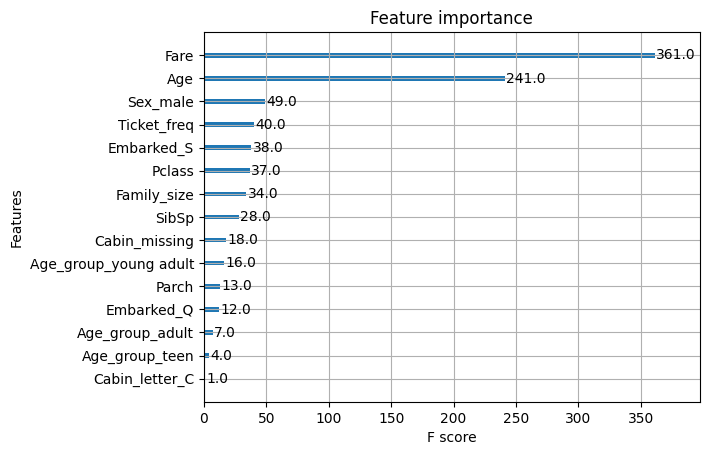

In [87]:
plot_importance(grid_search_xgb.best_estimator_)

**3. Confusion Matrix**

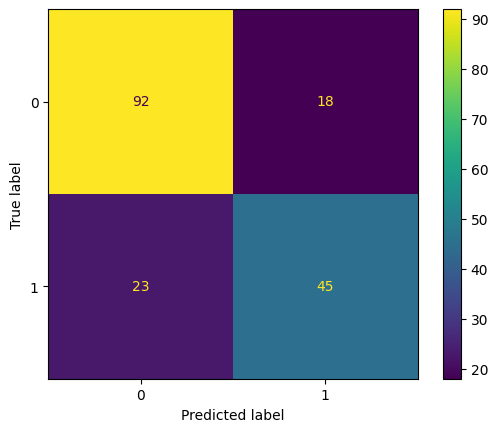

In [88]:
cm_xgb = confusion_matrix(y_val, y_pred_xgb, labels = best_xgb.classes_)
disp_xgb = ConfusionMatrixDisplay(cm_xgb, display_labels = best_xgb.classes_)
disp_xgb.plot()

**4. Accuracy**

In [89]:
accuracy_score(y_val, y_pred_xgb) * 100

76.96629213483146

# Final predictions and Creating submission file

In [90]:
final_pred = best_rf.predict(df_test)

In [91]:
submission = pd.DataFrame({
    'PassengerId': df_test_copy['PassengerId'],
    'Survived': final_pred
})

submission.to_csv('submission.csv', index = False)